In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import torch
import torch.nn.functional as F
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
import torchvision
from torchvision import transforms as T
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report,  confusion_matrix, ConfusionMatrixDisplay

In [2]:
def seed_everything(seed: int=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


seed_everything(51)

## Load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Normalizacja:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Dodanie kanału (szary obraz = 1 kanał)
X_train = X_train[..., np.newaxis]  # shape: (n, 28, 28, 1)
X_test = X_test[..., np.newaxis]

# One-hot
Y_train = to_categorical(Y_train.flatten())
Y_test = to_categorical(Y_test.flatten())

k = Y_train.shape[1]

print(f"X_train.shape: {X_train.shape} \nY_train.shape: {Y_train.shape} \nX_test.shape: {X_test.shape} \nY_test.shape: {Y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train.shape: (60000, 28, 28, 1) 
Y_train.shape: (60000, 10) 
X_test.shape: (10000, 28, 28, 1) 
Y_test.shape: (10000, 10)


## Model

In [10]:
k = Y_train.shape[1]
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

#hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

#last hidden layer i.e.. output layer
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(
  X_train, Y_train, validation_data=(X_test, Y_test), epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8042 - loss: 0.6225 - val_accuracy: 0.8872 - val_loss: 0.3157
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9007 - loss: 0.2697 - val_accuracy: 0.9078 - val_loss: 0.2528
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9171 - loss: 0.2256 - val_accuracy: 0.9124 - val_loss: 0.2441
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9259 - loss: 0.1991 - val_accuracy: 0.9029 - val_loss: 0.2643
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9336 - loss: 0.1796 - val_accuracy: 0.9227 - val_loss: 0.2104
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9446 - loss: 0.1523 - val_accuracy: 0.9276 - val_loss: 0.2106


## Model statistics

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


Classification report

In [13]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.89      0.89      1000
           3       0.92      0.94      0.93      1000
           4       0.86      0.92      0.89      1000
           5       0.98      0.99      0.98      1000
           6       0.82      0.72      0.77      1000
           7       0.97      0.97      0.97      1000
           8       1.00      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Confusion matrix

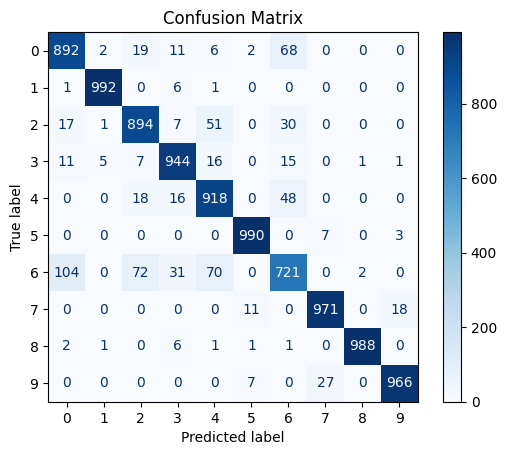

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Accuracy

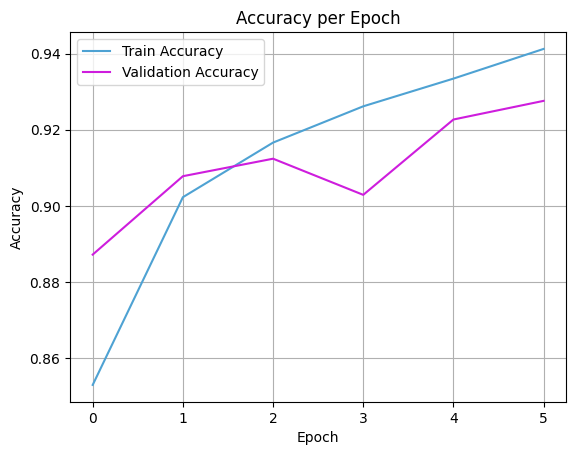

In [15]:
plt.plot(r.history['accuracy'], label='Train Accuracy', color = '#4ea2d3')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color = '#ce1ddd')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
epochs = len(r.history['accuracy'])
plt.xticks(ticks=range(epochs))
plt.grid(True)
plt.show()

Final Validation Accuracy : **0.93**
